In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


#### 💡 Mr. Pro is a scientific detective who learnt the concepts of basic machine learning and is ready to dive in. But first he needs the data. So let's load the data.

## Data Loading 📊

In [2]:
# Loading the data
df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv") 
X = df.drop("purchaseValue", axis=1) 
y = df['purchaseValue'] 

#### 💡 Mr. Pro intends to explore the data to find patterns and clue. So let's set aside a copy of the loaded data ( So that we don't need to load this data again later on) !!

In [3]:
df_original = df.copy()

#### Now let's explore the data with Mr. Pro !!

## Exploratory Data Analysis

In [4]:
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [5]:
df.shape

(116023, 52)

In [6]:
df.head(5)

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0


#### So there are 52 columns ( including the 'purchaseValue' target column ). Lets gather a quick info about them.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

#### So it is a mix of numerical, categorical and boolean data (prima facie, will later find out) as well !!

In [8]:
null_values = df.isnull().sum()
null_values_frame = null_values.to_frame('Null Values Count')
null_values_frame = null_values_frame[null_values_frame['Null Values Count'] > 0]
null_values_frame['Null Values %'] = round((null_values_frame['Null Values Count'] / len(df))*100, 2)
null_values_frame

,Null Values Count,Null Values %
trafficSource.isTrueDirect,73133,63.03
trafficSource.adContent,113060,97.45
trafficSource.keyword,71861,61.94
trafficSource.adwordsClickInfo.slot,111742,96.31
trafficSource.adwordsClickInfo.isVideoAd,111742,96.31
trafficSource.adwordsClickInfo.adNetworkType,111742,96.31
trafficSource.adwordsClickInfo.page,111742,96.31
pageViews,8,0.01
trafficSource.referralPath,73309,63.18
totals.bounces,68875,59.36


#### Visualizing the distribution of null values using a heatmap

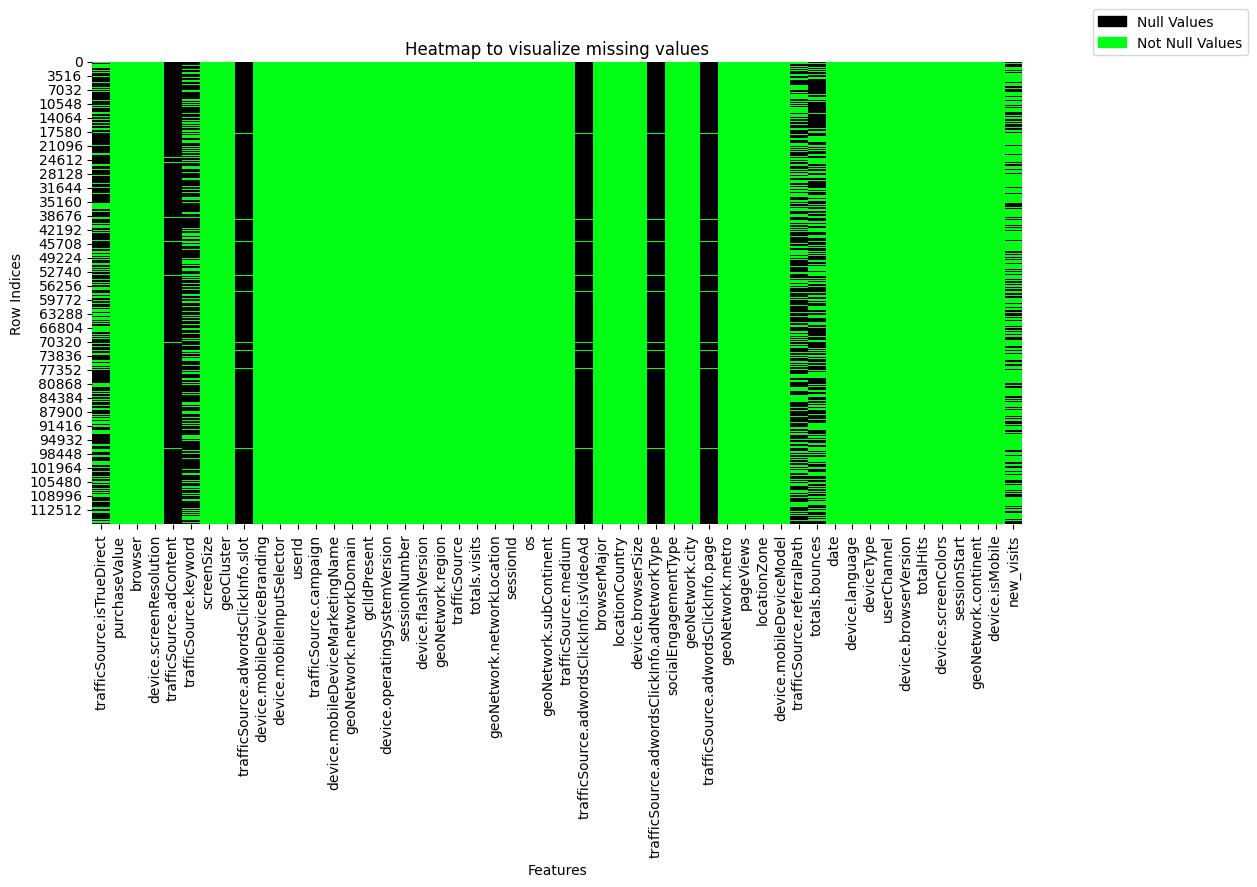

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

plt.figure(figsize=(12, 6))
cmap = sns.color_palette(['#00FF15', '#000000'])
heatmap = sns.heatmap(df.isnull(), cbar=False, cmap=cmap)
heatmap.set_xlabel('Features')
heatmap.set_ylabel('Row Indices')
labels = [
    Patch(color='#000000', label='Null Values'),
    Patch(color='#00FF15', label='Not Null Values')
    
]
plt.legend(handles=labels, bbox_to_anchor=(1.25, 1), loc='lower right')
plt.title('Heatmap to visualize missing values')
plt.show()

#### There are singificant null values in certain columns. 
<p>Columns like 
<ul>
    <li>trafficSource.adContent</li> 
    <li>trafficSource.adwordsClickInfo.slot</li>
    <li>trafficSource.adwordsClickInfo.isVideoAd</li>
    <li>trafficSource.adwordsClickInfo.adNetworkType</li>
    <li>trafficSource.adwordsClickInfo.page</li>

</ul> 
    have more than 90% null values.</p>

### Numerical Feature Analysis

<h4>First we extract the numerical features from the data. </h4>

In [10]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns
num_features

Index(['userId', 'gclIdPresent', 'sessionNumber', 'totals.visits', 'sessionId',
       'trafficSource.adwordsClickInfo.page', 'pageViews', 'locationZone',
       'totals.bounces', 'date', 'totalHits', 'sessionStart', 'new_visits'],
      dtype='object')

<h4>It appears that some other tytpe of data is also there apart from the numerical like booleans, date or id type of data. I need to handle them separately, but first plot a subplots. This would clarify it more</h4>

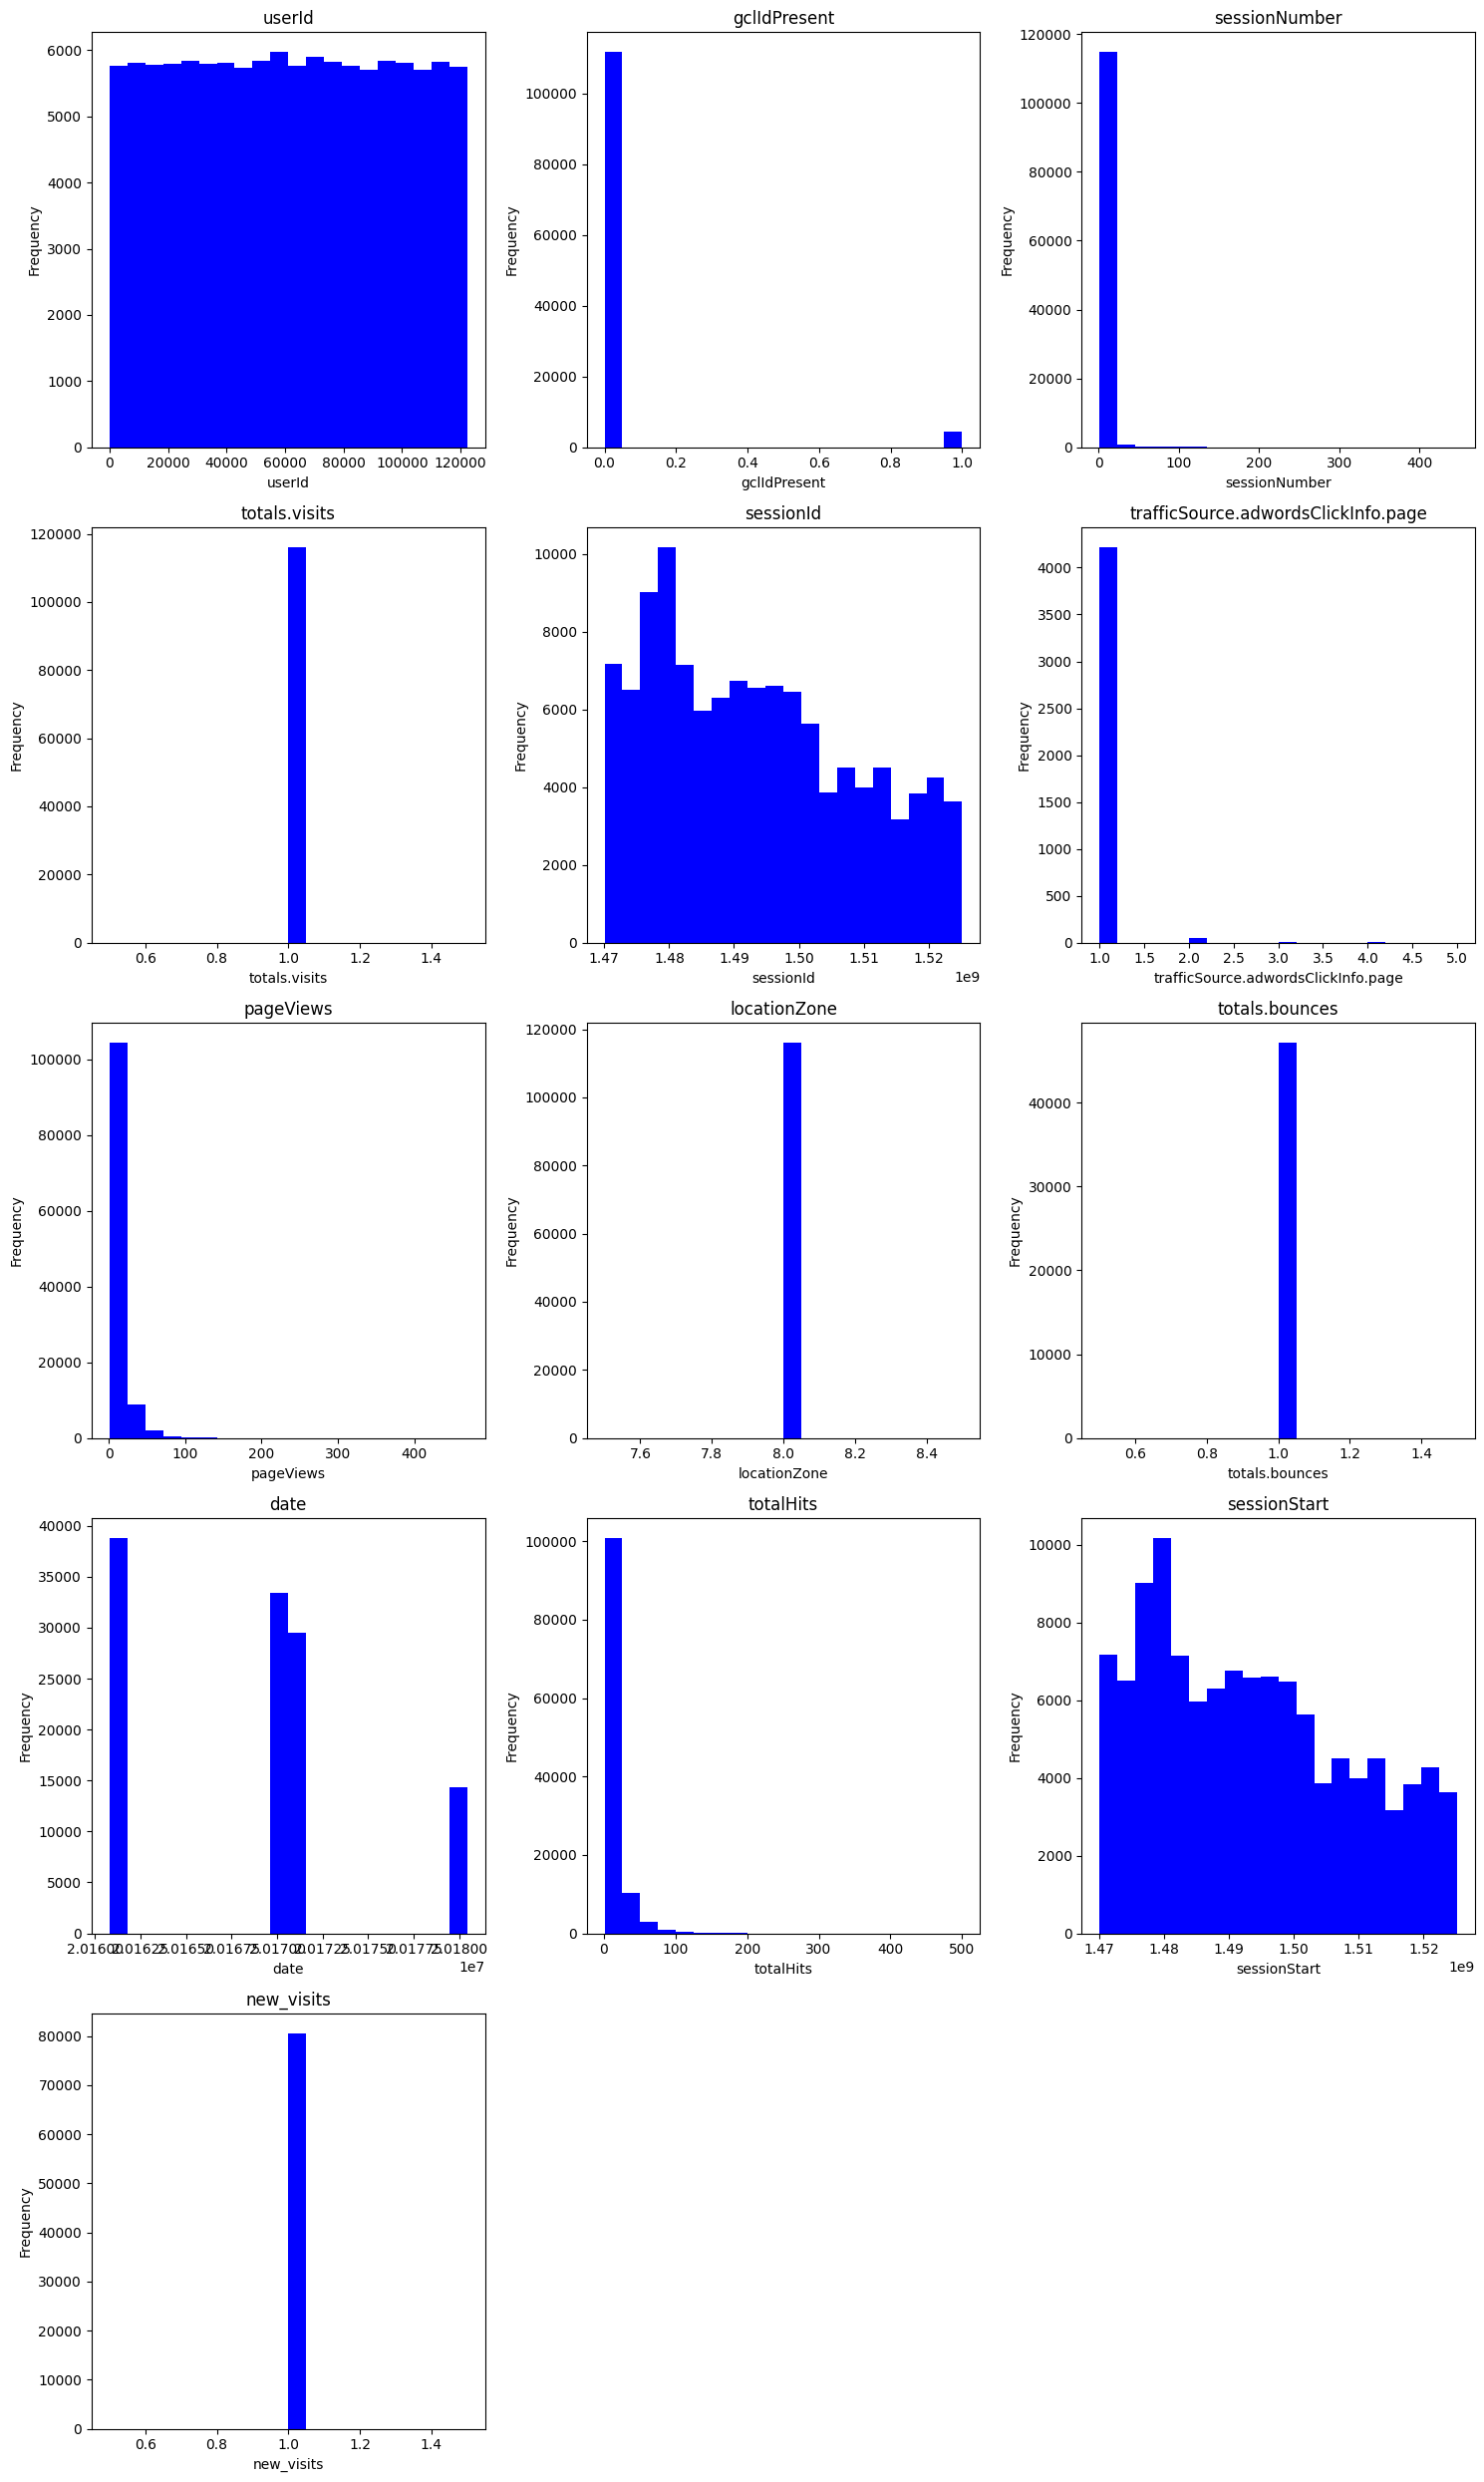

In [11]:
fig, axes = plt.subplots(5, 3, figsize=(15, 25))
axes = axes.flatten()

for i, col in enumerate(num_features):
    axes[i].hist(df[col].dropna(), bins=20, color='blue')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<p>It appears that though many features are represented as numerical data type only:
<ul>
    <li>sessionNumber</li>
    <li>pageViews</li>
    <li>totalHits</li>
    <li>trafficSource.adwordsClickInfo.page</li>
</ul>
are of numerical in nature. But trafficSource.adwordsClickInfo.page have majorly null values.
<br /><br />
Whereas, 

<ul>
    <li>gclIdPresent</li>
    <li>totals.visits</li>
    <li>totals.bounces</li>
    <li>new_visits</li>
</ul>

are boolean in nature.

The features
<ul>
    <li>sessionStart</li>
    <li>date</li>
</ul>

are in different format and thus would require some feature engineering.

The features

<ul>
    <li>sessionId</li>
    <li>userId</li>
</ul>

are not that useful features as they are id type of features.

And the feature:

<ul>
    <li>locationZone</li>
</ul>

contains only one value 8 and no null values so not useful.
</p>

<p>Now that we have identified true numerical features (excluding highly features containing high null values) let's find more details about their distribution and the correlation among them and the target variable.</p>

In [12]:
num_features = ['sessionNumber', 'pageViews', 'totalHits']

In [13]:
df[num_features].describe()

,sessionNumber,pageViews,totalHits
count,116023.000000,116015.000000,116023.000000
mean,2.691311,8.412352,10.607371
std,10.451613,14.344937,19.629576
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,2.000000,2.000000
75%,2.000000,10.000000,12.000000
max,447.000000,469.000000,500.000000


#### Correlation Matrix Heatmap of the Numerical Features

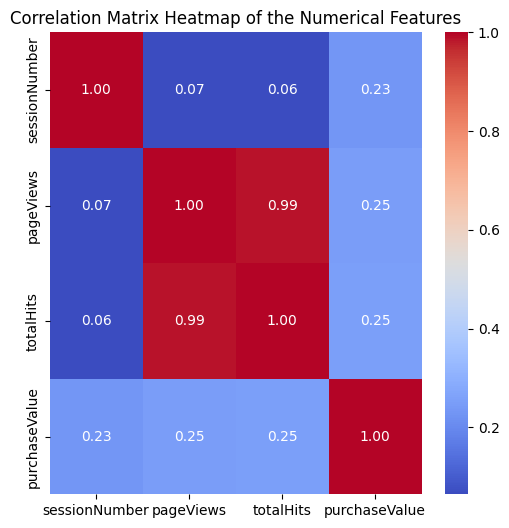

In [14]:
corr_features = num_features + ['purchaseValue']
corr_mat = df[corr_features].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap of the Numerical Features")
plt.show()

<h4>Correlation with purchaseValue (target):</h4>
<ul>
    <li>sessionNumber: 0.23</li>
    <li>pageViews: 0.25</li>
    <li>totalHits: 0.25</li>
</ul>

<h4>Highly correlated features:</h4>
<ul>
    <li>pageViews & totalHits: 0.99</li>
</ul>

### Categorical Features Analysis

<p>Next we extract the categorical features in the dataset and explore them.</p>

In [15]:
cat_features = X.select_dtypes(include=["object", "category"]).columns
cat_features

Index(['trafficSource.isTrueDirect', 'browser', 'device.screenResolution',
       'trafficSource.adContent', 'trafficSource.keyword', 'screenSize',
       'geoCluster', 'trafficSource.adwordsClickInfo.slot',
       'device.mobileDeviceBranding', 'device.mobileInputSelector',
       'trafficSource.campaign', 'device.mobileDeviceMarketingName',
       'geoNetwork.networkDomain', 'device.operatingSystemVersion',
       'device.flashVersion', 'geoNetwork.region', 'trafficSource',
       'geoNetwork.networkLocation', 'os', 'geoNetwork.subContinent',
       'trafficSource.medium', 'trafficSource.adwordsClickInfo.isVideoAd',
       'browserMajor', 'locationCountry', 'device.browserSize',
       'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType',
       'geoNetwork.city', 'geoNetwork.metro', 'device.mobileDeviceModel',
       'trafficSource.referralPath', 'device.language', 'deviceType',
       'userChannel', 'device.browserVersion', 'device.screenColors',
       'geoNetwor

Now many of these columns have value - 'not available in demo dataset', we need to filter these out. Apart from this high cardinality columns are also needed to be filtered out.

In [16]:
single_value_cat_features =  [col for col in cat_features if df[col].nunique() == 1]
high_cardinality_cols = [col for col in cat_features if 1< df[col].nunique() > 10]
demo_cols = [col for col in single_value_cat_features if df[col].unique()[0] == 'not available in demo dataset']

print("High Cardinality Columns: ", high_cardinality_cols)
print("\n \n Demo Columns: ", demo_cols)

High Cardinality Columns:  ['browser', 'trafficSource.adContent', 'trafficSource.keyword', 'trafficSource.campaign', 'geoNetwork.region', 'trafficSource', 'os', 'geoNetwork.subContinent', 'locationCountry', 'geoNetwork.city', 'geoNetwork.metro', 'trafficSource.referralPath']

 
 Demo Columns:  ['device.screenResolution', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'device.mobileDeviceMarketingName', 'device.operatingSystemVersion', 'device.flashVersion', 'geoNetwork.networkLocation', 'browserMajor', 'device.browserSize', 'device.mobileDeviceModel', 'device.language', 'device.browserVersion', 'device.screenColors']


In [17]:
non_demo_cols = [col for col in single_value_cat_features if df[col].unique()[0] != 'not available in demo dataset']
low_cardinality_cols = [col for col in cat_features if 1< df[col].nunique() <= 10]
filtered_cols = non_demo_cols + low_cardinality_cols
filtered_cols

['trafficSource.isTrueDirect',
 'screenSize',
 'trafficSource.adwordsClickInfo.isVideoAd',
 'socialEngagementType',
 'geoCluster',
 'trafficSource.adwordsClickInfo.slot',
 'geoNetwork.networkDomain',
 'trafficSource.medium',
 'trafficSource.adwordsClickInfo.adNetworkType',
 'deviceType',
 'userChannel',
 'geoNetwork.continent']

Now let's visualize the distribution of these filtered categorical features using subplots.

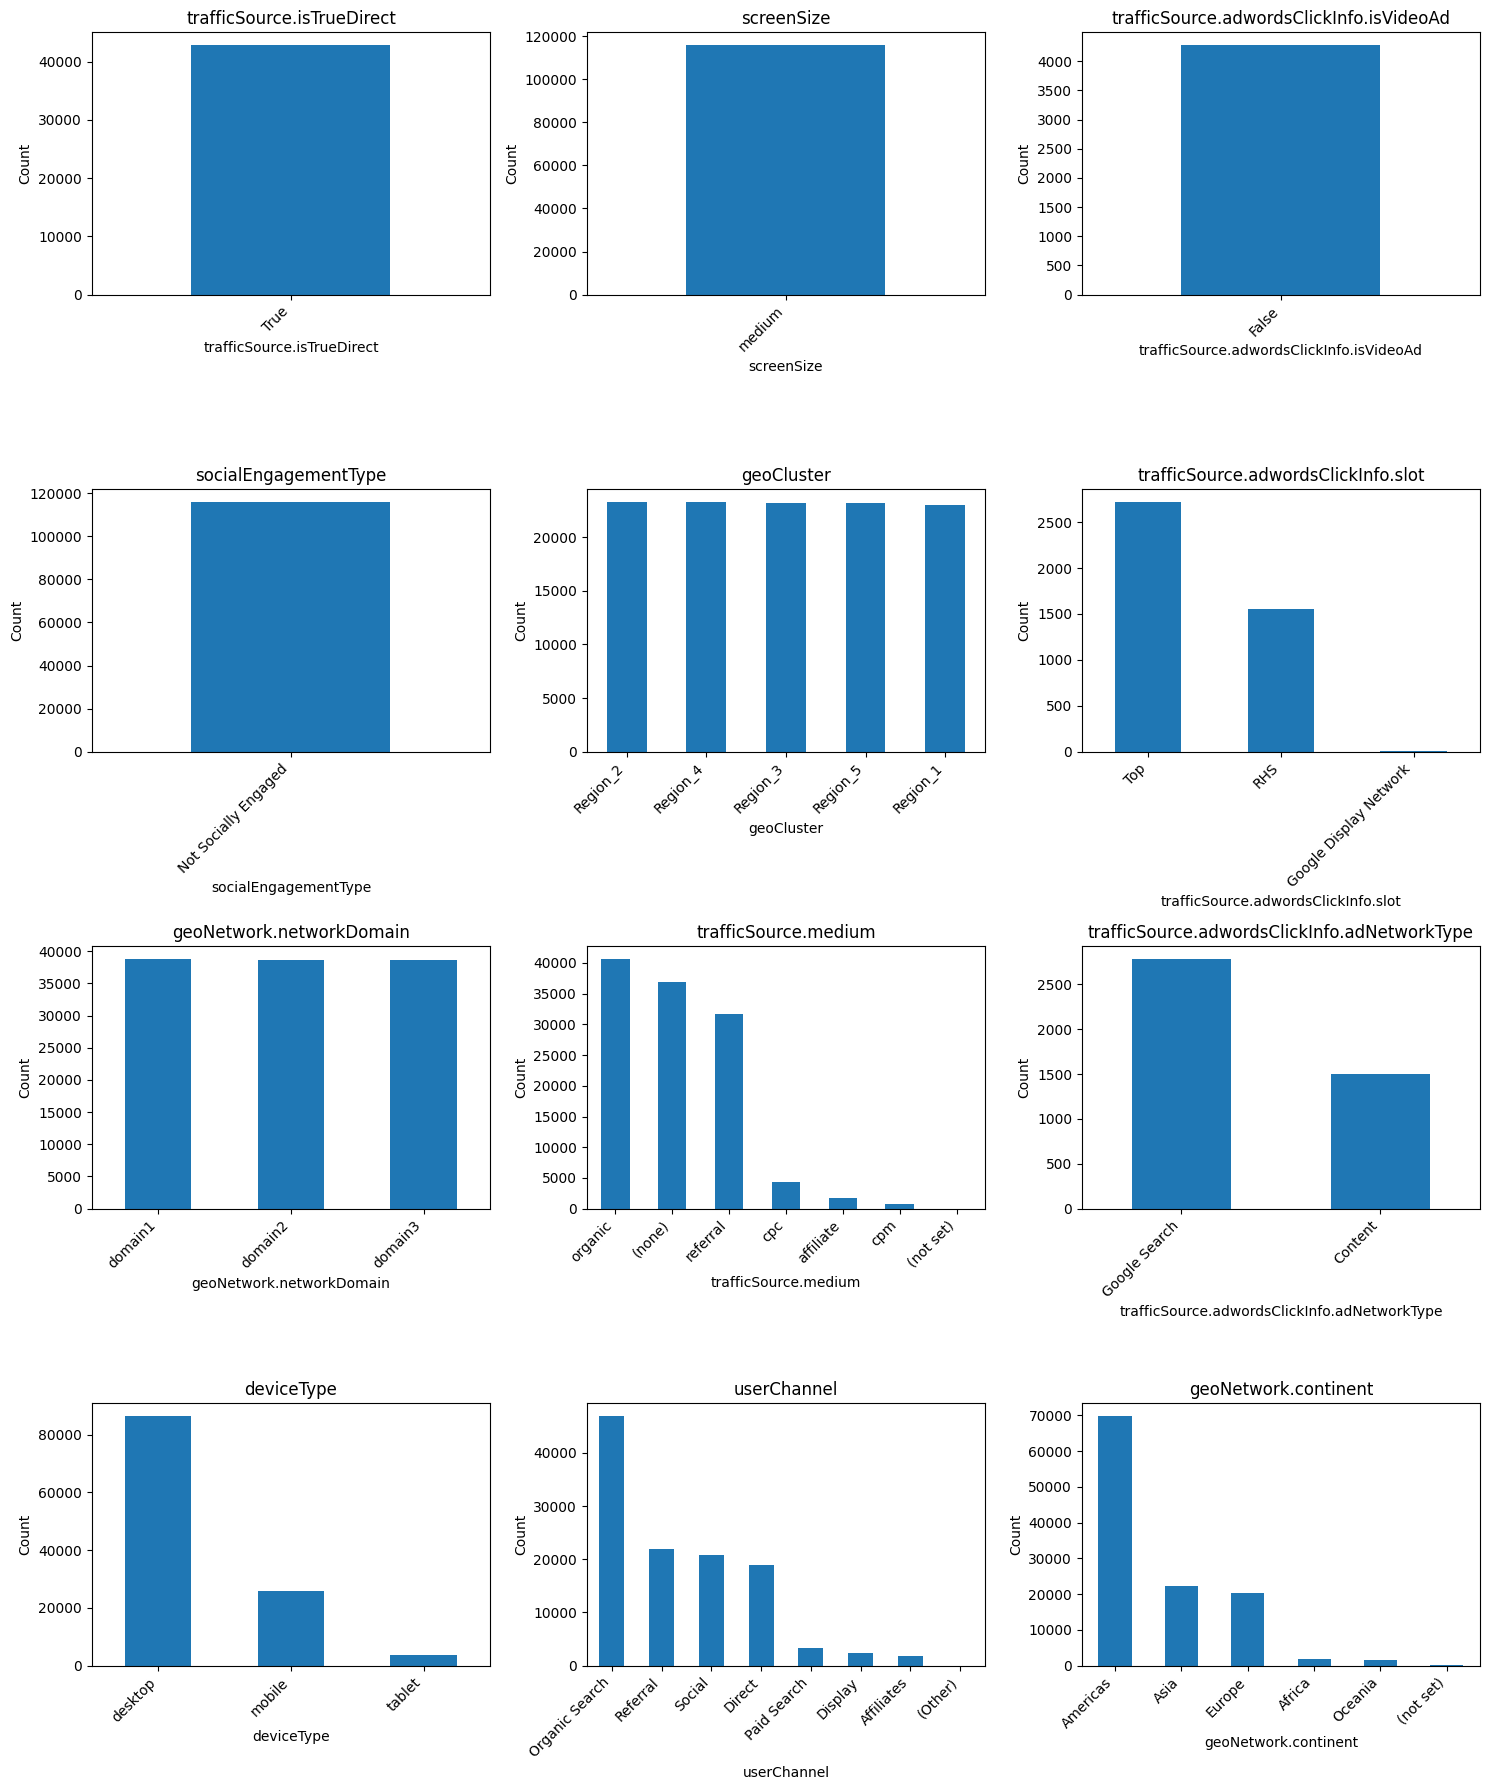

In [18]:
ncols = 3
cat_cols = filtered_cols


n_rows = (len(cat_cols) + ncols - 1) // ncols
fig, axes = plt.subplots(n_rows, ncols, figsize=(15, 18))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    value_counts = df[col].value_counts()
    value_counts = value_counts.sort_values(ascending=False)

    ax = axes[i]
    value_counts.plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

This shows that out of all these,
<ul>
    <li>'trafficSource.isTrueDirect'</li>
    <li>'trafficSource.adwordsClickInfo.isVideoAd'</li>
</ul>

are actually boolean and 'trafficSource.adwordsClickInfo.isVideoAd' have majorly null values.

Also,
<ul>
    <li>'screenSize'</li>
    <li>'socialEngagementType'</li>
</ul>

have only single value

Rest are typical categorical features.

The high cardinality features are:
<ul>
 <li>'browser'</li>
 <li>'trafficSource.adContent'</li>
 <li>'trafficSource.keyword'</li>
 <li>'trafficSource.campaign'</li>
 <li>'geoNetwork.region'</li>
 <li>'trafficSource'</li>
 <li>'os'</li>
 <li>'geoNetwork.subContinent'</li>
 <li>'locationCountry'</li>
 <li>'geoNetwork.city'</li>
 <li>'geoNetwork.metro'</li>
 <li>'trafficSource.referralPath'</li>
</ul>

And a large number of culumns have only one value: 'not available in demo dataset'


Now let's plot a correlation matrix to find correlation among categorical features. Here we would be using Cramer's V statistic. Here we will take only the filtered categories as high cardinality features doesn't go well with cramer's v approach.

The filtered categories also excludes boolean and single value features and features containing high null values.

In [19]:
filtered_cols = ['geoCluster',
 'geoNetwork.networkDomain',
 'trafficSource.medium',
 'deviceType',
 'userChannel',
 'geoNetwork.continent']

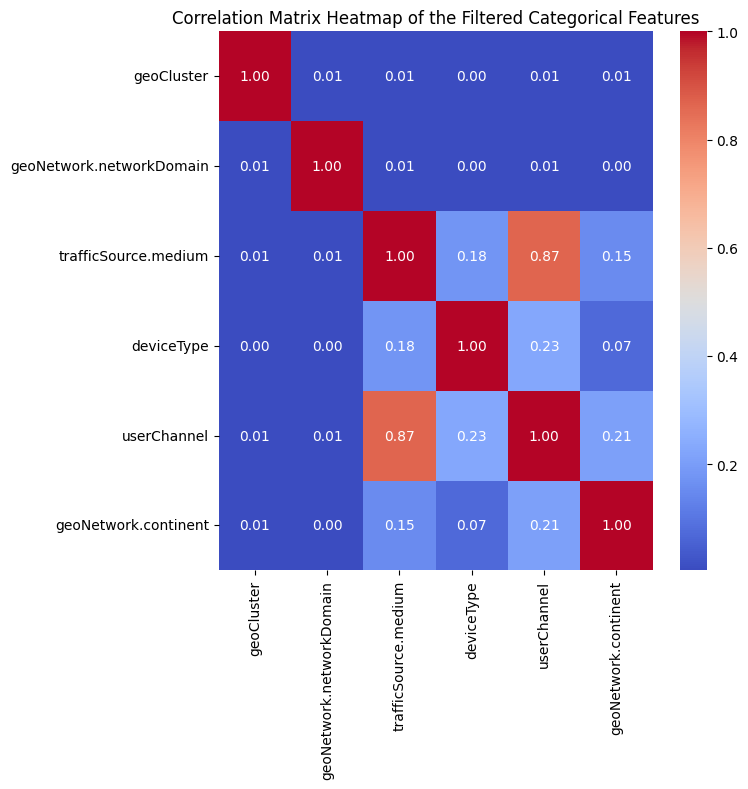

In [20]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

n = len(filtered_cols)

corr_mat = np.zeros((n, n))

for i in range(n):
        for j in range(n):
            corr_mat[i, j] = cramers_v(df[filtered_cols[i]], df[filtered_cols[j]])

corr_mat = pd.DataFrame(corr_mat, index=filtered_cols, columns=filtered_cols)
plt.figure(figsize=(7, 7))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap of the Filtered Categorical Features")
plt.show()

The highlights are:
<ul>
    highly correlated features: 
    <ul><li>'userChannel' & 'trafficSource.medium' (0.87)</li></ul>
    <br />
    Moderately correlated features:
    <ul>
        <li>deviceType & userChannel - 0.23</li>
        <li>geoNetwork.continent & userChannel - 0.21</li>
        <li>deviceType & trafficSource.medium - 0.18</li>
        <li>geoNetwork.continent & trafficSource.medium - 0.15</li>
    </ul>
    <br />

Rest all are having very low correlations.
</ul>


### Analysis of the Target Variable

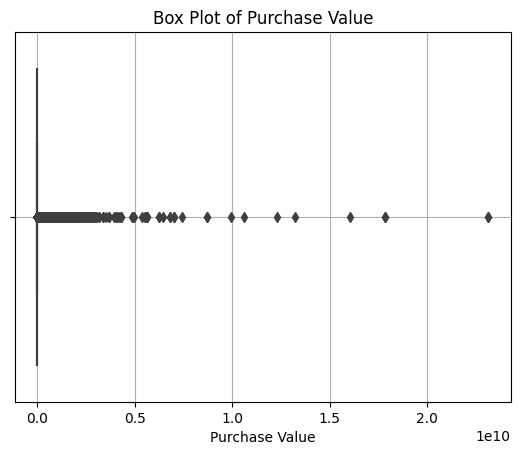

In [21]:
sns.boxplot(x=df['purchaseValue'])

plt.title('Box Plot of Purchase Value')
plt.xlabel('Purchase Value')
plt.grid(True)
plt.show()

This shows the presence of outliers in the data and most of the values are concentrated around 0.

In [22]:
df['purchaseValue'].describe()

count    1.160230e+05
mean     2.656393e+07
std      2.051825e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.312950e+10
Name: purchaseValue, dtype: float64

The descriptive statistics also reveals that the 75 percentile value is 0, thus, it is a 0 inflatted target.

## Feature Selection

So after doing the EDA, we found that, there are certain features which are redundant and we need to drop them, here they are:
<ul>
    <li>Having majorly null values: <code>'trafficSource.adContent', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.adwordsClickInfo.page' </code></li>
    <li>Having only single value: <code>'locationZone', 'device.screenResolution', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'device.mobileDeviceMarketingName', 'device.operatingSystemVersion', 'device.flashVersion', 'geoNetwork.networkLocation', 'browserMajor', 'device.browserSize', 'device.mobileDeviceModel', 'device.language', 'device.browserVersion', 'device.screenColors', 'screenSize', 'socialEngagementType'</code></li>
</ul>

<p>Now that we have a good idea about the data, before selecting the final features to work on, we apply the robust mutual_info_regression to select the most important features.</p>

In [23]:
df2 = df_original.copy()

In [24]:
cols = df2.columns

cols_to_drop = []

for col in cols:
    if (df2[col].isnull().mean() > 0.70):
        cols_to_drop.append(col)

df2.drop(columns=cols_to_drop, inplace=True)

In [25]:
df2.drop(columns=['userId', 'sessionId'], inplace=True)

In [26]:
X = df2.drop("purchaseValue", axis=1) 
y = df['purchaseValue']

Imputing the null values before mutual_info_regression feature selection

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, FunctionTransformer

bin_cols = ['trafficSource.isTrueDirect', 'gclIdPresent', 'totals.bounces', 'device.isMobile', 'new_visits']
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns

#imputation

bin_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('bin_encode', FunctionTransformer(lambda x: x.astype(int)))
])
num_imputer = SimpleImputer(strategy="most_frequent")
cat_imputer = SimpleImputer(strategy="most_frequent")

X[bin_cols] =  bin_transformer.fit_transform(X[bin_cols])
X[num_cols] =  num_imputer.fit_transform(X[num_cols])


X[cat_cols] =  cat_imputer.fit_transform(X[cat_cols])


for col in cat_cols:
    encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    X[col] = encoder.fit_transform(X[col].to_frame())

In [28]:
# from sklearn.feature_selection import mutual_info_regression

# mi = mutual_info_regression(X, y, discrete_features=True)
# selected_features = X.columns[mi > 0.01]

## Commenting it out as it takes a while

In [29]:
# selected_features

We see that using mutual_info_regression, we found the features that we would have otherwise selected after excluding the features having large count of null or only a single value throughout the feature, etc. This confirms to our earlier analysis. These will be the final selected features we would be using to build the model.

In [30]:
selected_features = ['browser', 'sessionNumber', 'geoNetwork.region', 'trafficSource', 'os',
       'geoNetwork.subContinent', 'trafficSource.medium', 'locationCountry',
       'geoNetwork.city', 'geoNetwork.metro', 'pageViews',
       'trafficSource.referralPath', 'date', 'deviceType', 'userChannel',
       'totalHits', 'sessionStart', 'geoNetwork.continent', 'device.isMobile', 'new_visits', 'trafficSource.isTrueDirect', 'totals.bounces']

In [31]:
X = df2.drop("purchaseValue", axis=1) 
y = df2['purchaseValue']
X_test = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv')

In [32]:
X = X[selected_features]
X_test = X_test[selected_features]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42, shuffle=True)

## Feature Engineering

<p>
    Now there are 2 columns that require feature engineering/extraction:
    <ul>
        <li>date</li>
        <li>sessionStart</li>
    </ul>


</p>

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

class DateTimeHandler(BaseEstimator, TransformerMixin):
    def __init__(self, date_col, session_start_col):
        self.date_col = date_col
        self.session_start_col = session_start_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()

        X_copy[self.date_col] = pd.to_datetime(X_copy[self.date_col], format='%Y%m%d', errors='coerce')
        X_copy[self.session_start_col] = pd.to_datetime(X_copy[self.session_start_col], unit='s', errors='coerce')

        return pd.DataFrame({
            'day_of_week': X_copy[self.date_col].dt.dayofweek,
            'is_weekend': X_copy[self.date_col].dt.dayofweek.isin([5, 6]).astype(int),
            'is_night': X_copy[self.session_start_col].dt.hour.between(0, 6).astype(int)
        }, index=X_copy.index)

<p>
    So using date and sessionStart features, 3 new features are created:
    <ul>
        <li>day_of_week: denoting day of the week</li>
        <li>is_weekend: denoting if it is weekend or not (Sat, Sun)</li>
        <li>is_night: denoting if the session started at night (between 0 hrs to 6 hrs)</li>
    </ul>
</p>

## Data Preprocessing

<p>
    So this is how the preprocessing pipeline is built:
    <ul>
        <li>
            The selected columns are segregated into:
            <ul>
                <li>num_cols: Containing numerical columns</li>
                <li>cat_cols: Containing categorical columns</li>
                <li>bin_cols: Containing specially identified binary nature columns</li>
                <li>date_session_cols: Containing columns that requires special feature engineering/extraction.</li>
            </ul>
        </li>
        <br />

<li>
        Using pipelines, different preprocessing steps are applied to these 4 different type of features

<ul>
                <li>num_cols: Imputing with 'most_frequent' (because the numerical columns here are discrete countable and using most_frequent which gives out discrete mode makes more sense), scaling with StandardScaler</li>
                <li>cat_cols: Imputing with 'most_frequent', encoding with OneHotEncoder for linear models and OrdinalEncoder for Tree based models</li>
                <li>bin_cols: Imputing the null values with 0 (opposite of the present 1 or True) and converting to interger type</li>
                <li>date_session_cols: Extracting day_of_week, is_weekend, is_night using a custom transformer</li>
            </ul>
        </li>


        
</ul>

</p>


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, FunctionTransformer, OneHotEncoder

date_session_cols = ['date', 'sessionStart']
bin_cols = ['trafficSource.isTrueDirect', 'totals.bounces', 'device.isMobile', 'new_visits']
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

bin_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('bin_encode', FunctionTransformer(lambda x: x.astype(int)))
])

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

datetime_pipe = Pipeline([
    ('datetime_handler', DateTimeHandler('date', 'sessionStart'))
])


preprocessor = ColumnTransformer(transformers=[
    ("bin", bin_transformer, bin_cols),
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols),
    ('datetime_pipe', datetime_pipe, date_session_cols)
])


pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor)
])


X_train_processed = pipeline.fit_transform(X_train)
X_val_processed = pipeline.transform(X_val)
X_processed = pipeline.fit_transform(X)

## Model Building

Importing important libraries

In [36]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import KFold, cross_val_score

### Baseline Model

<p>First to start off, let's try building a baseline model with "mean" strategy.</p>

In [37]:
from sklearn.dummy import DummyRegressor


dummy_regressor = DummyRegressor(strategy='mean')
dummy_regressor.fit(X_train_processed, y_train)
y_pred = dummy_regressor.predict(X_val_processed)
dr_r2_score = round(r2_score(y_val, y_pred), 5)


cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dummy_regressor, X_processed, y, cv=cv, scoring='r2', n_jobs=-1)
print('r2_score of Dummy Regressor on validation set: ', dr_r2_score)
print("mean cv r2_score of Dummy Regressor: ", round(scores.mean(), 5))



r2_score of Dummy Regressor on validation set:  -0.00028
mean cv r2_score of Dummy Regressor:  -0.00011


<p>So the baseline model with "mean" strategy gave CV r2_score: -0.00011</p>

### Linear Regressor

In [38]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train_processed, y_train)
y_pred = lr_model.predict(X_val_processed)
lr_r2_score = round(r2_score(y_val, y_pred), 5)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lr_model, X_processed, y, cv=cv, scoring='r2', n_jobs=-1)
print('r2_score of Linear Regressor on validation set: ', lr_r2_score)
print("mean cv r2_score of Linear Regressor: ", round(scores.mean(), 5))

r2_score of Linear Regressor on validation set:  0.21041
mean cv r2_score of Linear Regressor:  0.09855


<p>So the Linear Regressor Model gave CV r2_score: 0.09854</p>

Now let's focus on Ensemble Tree based Models. 
<p>Now we would try to use tree models and we can use OrdinalEncoder for categorical features as tree based models are not affected and it will reduce the dimensions of the feature space and improve training time</p>

In [39]:
tree_categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

preprocessor = ColumnTransformer(transformers=[
    ("bin", bin_transformer, bin_cols),
    ("num", numeric_transformer, num_cols),
    ("cat", tree_categorical_transformer, cat_cols),
    ('datetime_pipe', datetime_pipe, date_session_cols)
])

tree_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor)
])

X_train_processed = tree_pipeline.fit_transform(X_train)
X_val_processed = tree_pipeline.transform(X_val)
X_processed = tree_pipeline.fit_transform(X)

### Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(random_state=42)

rfr_model.fit(X_train_processed, y_train)
y_pred = rfr_model.predict(X_val_processed)
rfr_r2_score = round(r2_score(y_val, y_pred), 5)

print('r2_score of Random Forest Regressor on validation set: ', rfr_r2_score)

# # Skipping cross-validation score for random forest regressor as it is taking a lot of time.

r2_score of Random Forest Regressor on validation set:  0.23284


### XGBoost Regressor

In [41]:
from xgboost import XGBRegressor

xgbr_model = XGBRegressor(random_state=42)

xgbr_model.fit(X_train_processed, y_train)
y_pred = xgbr_model.predict(X_val_processed)
xgbr_r2_score = round(r2_score(y_val, y_pred), 5)

cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(xgbr_model, X_processed, y, cv=cv, scoring='r2', n_jobs=-1)
print('r2_score of XGBoost Regressor on validation set: ', xgbr_r2_score)
print("mean cv r2_score of XGBoost Regressor: ", round(scores.mean(), 5))

r2_score of XGBoost Regressor on validation set:  0.34833
mean cv r2_score of XGBoost Regressor:  0.25518


### LightGBM Regressor

In [42]:
from lightgbm import LGBMRegressor

lgbmr_model = LGBMRegressor(random_state=42, verbose=-1)

lgbmr_model.fit(X_train_processed, y_train)
y_pred = lgbmr_model.predict(X_val_processed)
lgbmr_r2_score = round(r2_score(y_val, y_pred), 5)

cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lgbmr_model, X_processed, y, cv=cv, scoring='r2', n_jobs=-1)
print('r2_score of LightGBM Regressor on validation set: ', lgbmr_r2_score)
print("mean cv r2_score of LightGBM Regressor: ", round(scores.mean(), 5))

r2_score of LightGBM Regressor on validation set:  0.33162
mean cv r2_score of LightGBM Regressor:  0.26385


## Model Comparison

Now that we have tried out 5 models(including Dummy Regressor), let's compare their performance on validation set.

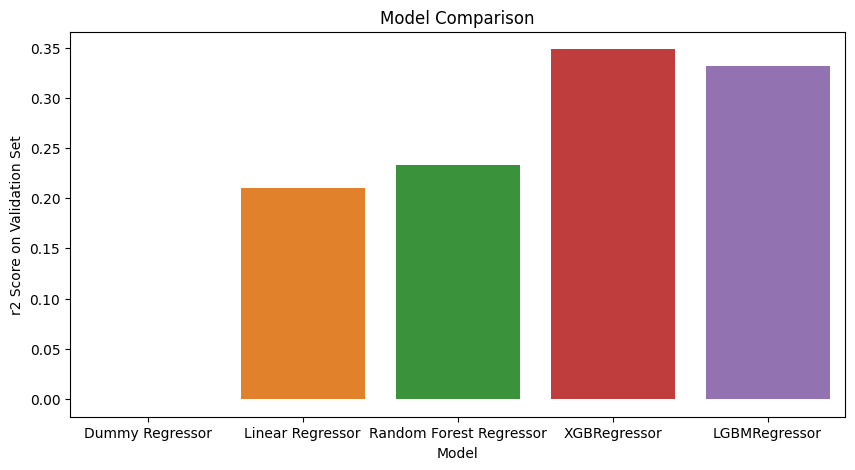

In [43]:
models = ['Dummy Regressor', 'Linear Regressor', 'Random Forest Regressor', 'XGBRegressor', 'LGBMRegressor']
score = [dr_r2_score, lr_r2_score, rfr_r2_score, xgbr_r2_score, lgbmr_r2_score]

data = {'Model': models, 'Score': score}
model_score = pd.DataFrame(data)

plt.figure(figsize=(10, 5))
sns.barplot(x = 'Model', y = 'Score', data = model_score)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('r2 Score on Validation Set')
plt.show()

We found tha XGBRegressor and LGBMRegressor are the two best performing models and thus we would be optimizing these models using Hyperparameter Tuning next.

## Model Optimization - Hyperparameter Tuning on Best Models

In [44]:
X_processed = tree_pipeline.fit_transform(X)
X_val_processed = tree_pipeline.transform(X_val)
X_test_processed = tree_pipeline.transform(X_test)
X.shape

(116023, 22)

I tried using GridSearchCV and RandomizedSearchCV at first but these were slow and didn't yielding good results.

In [45]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import make_scorer, r2_score
# import scipy

# param_dist = {
#     'max_depth': [3, 5, 7, 9],
#     'min_child_weight': [1, 3, 5],
#     'subsample': scipy.stats.uniform(0.6, 0.4),
#     'colsample_bytree': scipy.stats.uniform(0.7, 0.3),
#     'reg_alpha': scipy.stats.loguniform(1e-5, 100),
#     'reg_lambda': scipy.stats.loguniform(1e-5, 100),
#     'learning_rate': [0.01, 0.05, 0.1, 0.2]
# }
# r2_scorer = make_scorer(r2_score)
# tuner = RandomizedSearchCV(
#     estimator=xgbr_model,
#     param_distributions=param_dist,
#     n_iter=50,  
#     scoring='neg_mean_squared_error',
#     cv=5,
#     n_jobs=-1
# )
# tuner.fit(X_train_processed, y_train)

## Tried with GridSearchCV as well with changing number of tuning parameters.


# from sklearn.model_selection import GridSearchCV

# param_grid = param_grid = {
#     'max_depth': [3, 5, 7, 9],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.4, 0.5, 0.6, 0.7],
#     'colsample_bytree': [0.4, 0.5, 0.6, 0.8],
#     'reg_alpha': [1, 3, 5, 7],
#     'reg_lambda': [1, 3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2]
# }
# grid_search = GridSearchCV(xgbr_model, param_grid, cv=3, n_jobs=-1, scoring='r2')
# grid_search.fit(X_train_processed, y_train)

## Searching and Tuning take time so commenting it out for the submission.

Finally after getting confirmation from Instructor sir (Jimmy Sir) that we are allowed to use Optuna.

In [46]:
# import optuna
# from xgboost import XGBRegressor
# from sklearn.model_selection import cross_val_score

# def objective(trial):
#     params = {
#         'objective': 'reg:squarederror',
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
#         'subsample': trial.suggest_float('subsample', 0.5, 0.9),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
#     }
    
#     model = XGBRegressor(**params)
#     scores = cross_val_score(model, X_processed, y, cv=5, scoring='r2', n_jobs=-1)
#     return scores.mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=300)

# print("Best r2 score:", study.best_value)
# print("Best parameters:", study.best_params)

## Searching and Tuning take time so commenting it out for the submission.

In [47]:
xgbr_tuned_model = XGBRegressor(
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42,
    n_estimators = 942,
    max_depth = 10,
    learning_rate = 0.06386303424532927,
    subsample = 0.823441649650731,
    colsample_bytree = 0.8673329630059115,
    min_child_weight = 1,
    reg_alpha = 1.1244934410423777,
    reg_lambda = 7.272508348257643,
    
)

xgbr_tuned_model.fit(X_processed, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8673329630059115, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.06386303424532927, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=942, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [48]:
xgbr_tuned_model.score(X_processed, y)

0.9908186721489065

In [49]:
xgbr_tuned_model_2 = XGBRegressor(
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42,
    n_estimators = 918,
    max_depth = 10,
    learning_rate = 0.08825177880376113,
    subsample = 0.8888421266582718,
    colsample_bytree = 0.8110832653994628,
    min_child_weight = 1,
    reg_alpha = 0.6482431303007123,
    reg_lambda = 3.9268444491819876
)

xgbr_tuned_model_2.fit(X_processed, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8110832653994628, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08825177880376113, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=918, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [50]:
xgbr_tuned_model_2.score(X_processed, y)

0.9985290109977477

In [51]:
# from sklearn.metrics import make_scorer, r2_score
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

# cv = KFold(n_splits=4, shuffle=True, random_state=42)
# scores = cross_val_score(xgbr_tuned_model, X_processed, y, cv=cv, scoring='r2', verbose=2)
# print("scores: ", scores)
# print("mean score:", scores.mean())

In [52]:
# import optuna
# from sklearn.model_selection import cross_val_score

# def objective(trial):
#     params = {
#         'objective': 'regression',
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
#         "num_leaves": trial.suggest_int("num_leaves", 16, 256),
#         "max_depth": trial.suggest_int("max_depth", 3, 16),
#         "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#         "subsample": trial.suggest_float("subsample", 0.5, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
#         "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
#         "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
#         "verbose": -1
#     }
    
#     model = LGBMRegressor(**params)
#     scores = cross_val_score(model, X_processed, y, cv=5, scoring='r2', n_jobs=-1)
#     return scores.mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# print("Best r2 score: ", study.best_value)
# print("Best parameters: ", study.best_params)

## Searching and Tuning take time so commenting it out for the submission.

In [53]:
lgbmr_tuned_model = LGBMRegressor(
    objective='regression',
    n_jobs=-1,
    random_state=42,
    n_estimators = 830,
    max_depth = 10,
    learning_rate = 0.07284510831228587,
    num_leaves = 234,
    min_child_samples = 5,
    subsample = 0.8487520545193049,
    colsample_bytree = 0.7728029238128189,
    reg_alpha = 2.8449312370707167,
    reg_lambda = 0.14992250577697566
)

lgbmr_tuned_model.fit(X_processed, y)

LGBMRegressor(colsample_bytree=0.7728029238128189,
              learning_rate=0.07284510831228587, max_depth=10,
              min_child_samples=5, n_estimators=830, n_jobs=-1, num_leaves=234,
              objective='regression', random_state=42,
              reg_alpha=2.8449312370707167, reg_lambda=0.14992250577697566,
              subsample=0.8487520545193049)

In [54]:
lgbmr_tuned_model.score(X_processed, y)

0.9681116199515677

In [55]:
# from sklearn.metrics import make_scorer, r2_score
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

# cv = KFold(n_splits=4, shuffle=True, random_state=42)
# scores = cross_val_score(lgbmr_tuned_model, X_processed, y, cv=cv, scoring='r2', verbose=2)
# print("scores: ", scores)
# print("mean score:", scores.mean())

So finally it turns out that tuned XGBRegressor is performing the best with r2_score on whole set - 0.9985 compared to tuned LGBMRegressor with CV r2_score - 0.9681. Since whole set is used for training comparing validation sets don't make sense. Using cross validation could give a picture but again these would train it in comparatively less data and might not give the true picture of the model when tested in the unseen test.

### Trying 2 stage approach

<p>So at last I thought of implementing a 2 stage cascading model, where I placed a tuned-classifier model trained on the entire set as a final check. This model's prediction would complement the regression model's purchaseValue prediction, this is done as the target in the training is 0 inflatted indicating a large number non purchases. Let's see if it helps in increasing the final score.</p> 

In [56]:
# import optuna
# from xgboost import XGBClassifier
# from sklearn.model_selection import cross_val_score

# def objective(trial):
#     params = {
#         'objective': 'binary:logistic',
#         'eval_metric': 'logloss',
#         'use_label_encoder': False,
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
#         'subsample': trial.suggest_float('subsample', 0.5, 0.9),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10, log=True),
#         'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10, log=True),
#     }
    
#     model = XGBClassifier(**params)
#     scores = cross_val_score(model, X_processed, y_cf, cv=5, scoring='accuracy', n_jobs=-1)
#     return scores.mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=300)

# print("Best r2 score:", study.best_value)
# print("Best parameters:", study.best_params)

In [57]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor


y_cf = pd.Series(np.where(y>0, 1, 0))
X_train, X_val, y_train, y_val, y_cf_train, y_cf_val = train_test_split(X, y, y_cf, test_size=0.10, random_state=42, shuffle=True)

cf_model = XGBClassifier(objective='binary:logistic',
    n_jobs=-1,
    random_state=42,
    use_label_encoder= False,
    n_estimators = 724,
    max_depth = 9,
    learning_rate = 0.09887555808482465,
    subsample = 0.8557686819281127,
    colsample_bytree = 0.8670305106475789,
    min_child_weight = 1,
    reg_alpha = 0.02028651725950668,
    reg_lambda = 0.0293059921124194)

cf_model.fit(X_train_processed, y_cf_train)
y_cf_train_pred = cf_model.predict(X_train_processed)
y_cf_val_pred = cf_model.predict(X_val_processed)
print("accuracy on train set", accuracy_score(y_cf_train, y_cf_train_pred))
print("accuracy on val set", accuracy_score(y_cf_val, y_cf_val_pred))


accuracy on train set 0.9998180425205899
accuracy on val set 0.9500991122985435


The accuracy turn's out good enough.

In [58]:
cf_model.fit(X_processed, y_cf)
y_cf_pred = cf_model.predict(X_processed)
accuracy_score(y_cf, y_cf_pred)

0.9996724787326651

In [59]:
y_pred = xgbr_tuned_model_2.predict(X_processed)
y_pred = y_pred*y_cf_pred
xgbr_cf_r2_score = round(r2_score(y, y_pred), 5)

print('r2_score of Two Stage XGBoost Classifier-Regressor on whole set: ', xgbr_cf_r2_score)

r2_score of Two Stage XGBoost Classifier-Regressor on whole set:  0.99871


It turn's out there is a marginal increase in the r2_score on the whole set. So let us use this cascading model.

In [60]:
best_model = xgbr_tuned_model_2
best_preprocess_pipeline = tree_pipeline

## Submitting the Best Model

In [61]:
X_processed_final = best_preprocess_pipeline.fit_transform(X)
X_test_processed_final = best_preprocess_pipeline.transform(X_test)
best_model.fit(X_processed_final, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8110832653994628, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08825177880376113, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=918, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [62]:
y_pred_cf=cf_model.predict(X_test_processed_final)
y_pred=best_model.predict(X_test_processed_final)
y_pred=y_pred*y_pred_cf
submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "purchaseValue": y_pred}) 
submission.to_csv('submission.csv',index=False)

Turns out my model scored a 0.67595 public score. 